In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import yellowbrick
import shap
import scipy.cluster.hierarchy as shc
import matplotlib.patches as patches
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from matplotlib.patches import Rectangle
from pywaffle import Waffle
from math import isnan
from random import sample
from numpy.random import uniform
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, balanced_accuracy_score, f1_score, cohen_kappa_score, classification_report
from scipy import stats
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, cohen_kappa_score, recall_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import RFE
from sklearn.feature_selection import mutual_info_classif
from xgboost import XGBClassifier
from pyswarms.single import GlobalBestPSO

In [2]:
file_path = r"D:\Kuliah IPB\02 Kuliah\03 Semester 3\Pemodelan Klasifikasi\UAS\df_model.csv"
df_model = pd.read_csv(file_path, index_col=0)
df_model

,R105,KALORI_KAP,PROTE_KAP,LEMAK_KAP,KARBO_KAP,FOOD_LABEL,Pengeluaran_Jenis_A,Pengeluaran_Jenis_B,Pengeluaran_Jenis_C,Pengeluaran_Jenis_D,...,Pengeluaran_Jenis_M,Pengeluaran_Jenis_N,R2208A2,R2208A3,R2208A4,R2208A5,nilai_bantuan(rp),rataan_beras(rp),rataan_telur(rp),rataan_lainnya(rp)
URUT,,,,,,,,,,,,,,,,,,,,,
500001,2,2365.173362,67.130240,43.222388,352.985743,0,1,1,1,1,...,1,0,Tidak,Tidak,Ya,Tidak,150000.0,50000.0,10000.0,17500.0
500002,1,2611.639071,69.091893,30.118243,471.997686,0,1,1,1,0,...,1,1,Tidak,Tidak,Tidak,Ya,150000.0,27500.0,6500.0,8000.0
500003,2,2526.510476,68.742619,58.517619,360.456190,0,1,0,1,1,...,1,1,Tidak,Tidak,Ya,Tidak,100000.0,60000.0,15000.0,25000.0
500004,1,3655.854810,141.502615,119.460426,454.939531,0,1,1,1,1,...,1,1,Tidak,Tidak,Tidak,Tidak,0.0,0.0,0.0,0.0
500005,1,2330.987934,78.533354,53.141607,254.846110,0,1,0,1,1,...,1,1,Tidak,Tidak,Tidak,Tidak,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525886,1,2227.460536,81.321857,45.307661,306.247218,0,1,1,1,1,...,1,1,Tidak,Tidak,Tidak,Tidak,0.0,0.0,0.0,0.0
525887,1,1711.114357,68.675743,46.467657,212.155300,0,1,0,1,1,...,1,0,Tidak,Tidak,Tidak,Tidak,0.0,0.0,0.0,0.0
525888,1,1621.781673,48.896660,45.535567,215.970774,0,1,0,0,1,...,1,1,Tidak,Tidak,Tidak,Tidak,0.0,0.0,0.0,0.0


In [3]:
categorical_columns = ['R2208A2', 'R2208A3', 'R2208A4', 'R2208A5']
for col in categorical_columns:
    df_model[col] = df_model[col].map({'Tidak': 0, 'Ya': 1})
df_model[categorical_columns].head()

,R2208A2,R2208A3,R2208A4,R2208A5
URUT,,,,
500001,0,0,1,0
500002,0,0,0,1
500003,0,0,1,0
500004,0,0,0,0
500005,0,0,0,0


In [4]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25890 entries, 500001 to 525890
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   R105                 25890 non-null  int64  
 1   KALORI_KAP           25890 non-null  float64
 2   PROTE_KAP            25890 non-null  float64
 3   LEMAK_KAP            25890 non-null  float64
 4   KARBO_KAP            25890 non-null  float64
 5   FOOD_LABEL           25890 non-null  int64  
 6   Pengeluaran_Jenis_A  25890 non-null  int64  
 7   Pengeluaran_Jenis_B  25890 non-null  int64  
 8   Pengeluaran_Jenis_C  25890 non-null  int64  
 9   Pengeluaran_Jenis_D  25890 non-null  int64  
 10  Pengeluaran_Jenis_E  25890 non-null  int64  
 11  Pengeluaran_Jenis_F  25890 non-null  int64  
 12  Pengeluaran_Jenis_G  25890 non-null  int64  
 13  Pengeluaran_Jenis_H  25890 non-null  int64  
 14  Pengeluaran_Jenis_I  25890 non-null  int64  
 15  Pengeluaran_Jenis_J  25890 non-null

# Split Data

In [5]:
X = df_model.drop(['FOOD_LABEL', 'PROTE_KAP', 'LEMAK_KAP', 'KARBO_KAP'], axis=1)
y = df_model['FOOD_LABEL']

# # SMOTE terbaik dengan ratio=1
# sm = SMOTE(random_state=123, sampling_strategy=0.75)
# X, y = sm.fit_resample(X, y)

X_ori = X.copy()
y_ori = y.copy()

X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.3,
                                                   shuffle=True,
                                                   stratify=y,
                                                   random_state=86)

In [6]:
print(X_train.shape)
print(X_test.shape)

(18123, 24)
(7767, 24)


In [7]:
def eval_model_holdout(model, xtrain, ytrain, xtest, ytest, plot=False):
    model.fit(xtrain, ytrain)
    y_pred_train = model.predict(xtrain)
    y_pred_test = model.predict(xtest)
    
    cm_test = confusion_matrix(ytest, y_pred_test)
    tn, fp, fn, tp = cm_test.ravel()
    sensitivity = tp / (tp + fn) 
    specificity = tn / (tn + fp) 

    print("Holdout Evaluation (Train):")
    print("Balanced Accuracy:", round(balanced_accuracy_score(ytrain, y_pred_train), 2))
    print("F1 Score:", round(f1_score(ytrain, y_pred_train), 2))
    print("Kappa:", round(cohen_kappa_score(ytrain, y_pred_train), 2))

    print("\nHoldout Evaluation (Test):")
    print("Balanced Accuracy:", round(balanced_accuracy_score(ytest, y_pred_test), 2))
    print("F1 Score:", round(f1_score(ytest, y_pred_test), 2))
    print("Kappa:", round(cohen_kappa_score(ytest, y_pred_test), 2))
    print("Sensitivity (Recall):", round(sensitivity, 2))
    print("Specificity:", round(specificity, 2))

    if plot:
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues',
                    xticklabels=['Tidak Miskin', 'Miskin'], yticklabels=['Tidak Miskin', 'Miskin'])
        plt.title('Confusion Matrix Testing Data')
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.show()

In [8]:
cv = KFold(n_splits=10, shuffle=True, random_state=86)

def specificity_score(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()
    return tn / (tn + fp)

specificity_scorer = make_scorer(specificity_score)
sensitivity_scorer = make_scorer(recall_score)

def eval_model_CV(model, X, y):    
    cv_results = cross_validate(
        model, X, y, cv=cv, 
        scoring={
            'balanced_accuracy': 'balanced_accuracy',
            'f1': 'f1',
            'kappa': make_scorer(cohen_kappa_score),
            'sensitivity': sensitivity_scorer,
            'specificity': specificity_scorer
        },
        return_train_score=False
    )

    balanced_acc_scores = cv_results['test_balanced_accuracy']
    f1_scores = cv_results['test_f1']
    kappa_scores = cv_results['test_kappa']
    sensitivity_scores = cv_results['test_sensitivity']
    specificity_scores = cv_results['test_specificity']
    
    mean_bal_acc = round(np.mean(balanced_acc_scores), 2)
    mean_f1 = round(np.mean(f1_scores), 2)
    mean_kappa = round(np.mean(kappa_scores), 2)
    mean_sensitivity = round(np.mean(sensitivity_scores), 2)
    mean_specificity = round(np.mean(specificity_scores), 2)
    
    print('Mean Bal Acc (Test)  :', mean_bal_acc)
    print('Mean F1 Score (Test) :', mean_f1)
    print('Mean Kappa (Test)    :', mean_kappa)
    print('Mean Sensitivity (Test):', mean_sensitivity)
    print('Mean Specificity (Test):', mean_specificity)

In [9]:
def mergeXy_for_CV(X1, X2, y_train, y_test):
    merge_X = pd.concat([X1, X2], ignore_index=True)
    merge_y = y_train.tolist() + y_test.tolist()
    return merge_X, merge_y

# Baseline Model

In [10]:
rf_model = RandomForestClassifier(n_estimators=50, random_state=86, max_depth=10, min_samples_split=2, min_samples_leaf=2)
xgb_model = XGBClassifier(random_state=86, eval_metric='logloss', learning_rate=0.01, max_depth=5, n_estimators=50)

Holdout Evaluation (Train):
Balanced Accuracy: 0.7
F1 Score: 0.54
Kappa: 0.5

Holdout Evaluation (Test):
Balanced Accuracy: 0.66
F1 Score: 0.44
Kappa: 0.4
Sensitivity (Recall): 0.34
Specificity: 0.98


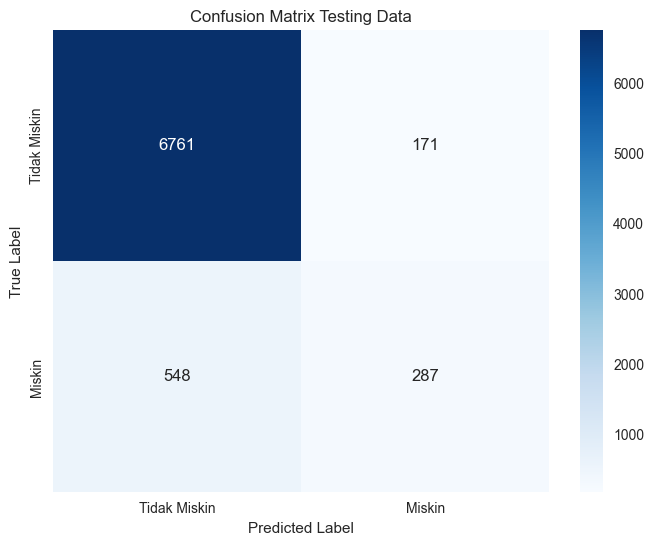

In [11]:
# Define Stacking Ensemble
stacking_ensemble = StackingClassifier(
    estimators=[('rf', rf_model), ('xgb', xgb_model)],
    final_estimator=LogisticRegression(random_state=86)
)
eval_model_holdout(stacking_ensemble, X_train, y_train, X_test, y_test, plot=True)

In [12]:
eval_model_CV(stacking_ensemble, X, y)

Mean Bal Acc (Test)  : 0.67
Mean F1 Score (Test) : 0.46
Mean Kappa (Test)    : 0.41
Mean Sensitivity (Test): 0.35
Mean Specificity (Test): 0.98


# Feature Selection

## Variance Threshold

In [15]:
X_train_v1, X_test_v1, y_tain_v1, y_test_v1 = X_train.copy(), X_test.copy(), y_train.copy(), y_test.copy()

## K-Best Feature

In [16]:
X_train_v2, X_test_v2, y_train_v2, y_test_v2 = X_train.copy(), X_test.copy(), y_train.copy(), y_test.copy()

In [17]:
# Initialize lists for storing results
bal_acc_list = []
f1_score_list = []
kappa_list = []
k_list = []

# Test different numbers of selected features (1 to 20) using SelectKBest with the ensemble
for k in range(1, 21):
    selector = SelectKBest(mutual_info_classif, k=k)
    selector.fit(X_train, y_train)
    
    sel_X_train = selector.transform(X_train)
    sel_X_test = selector.transform(X_test)
    
    # Fit the ensemble model on selected features
    stacking_ensemble.fit(sel_X_train, y_train)
    kbest_preds = stacking_ensemble.predict(sel_X_test)
    
    bal_acc_kbest = round(balanced_accuracy_score(y_test, kbest_preds), 2)
    f1_score_kbest = round(f1_score(y_test, kbest_preds), 2)
    kappa_kbest = round(cohen_kappa_score(y_test, kbest_preds), 2)
    
    bal_acc_list.append(bal_acc_kbest)
    f1_score_list.append(f1_score_kbest)
    kappa_list.append(kappa_kbest)
    k_list.append(k)

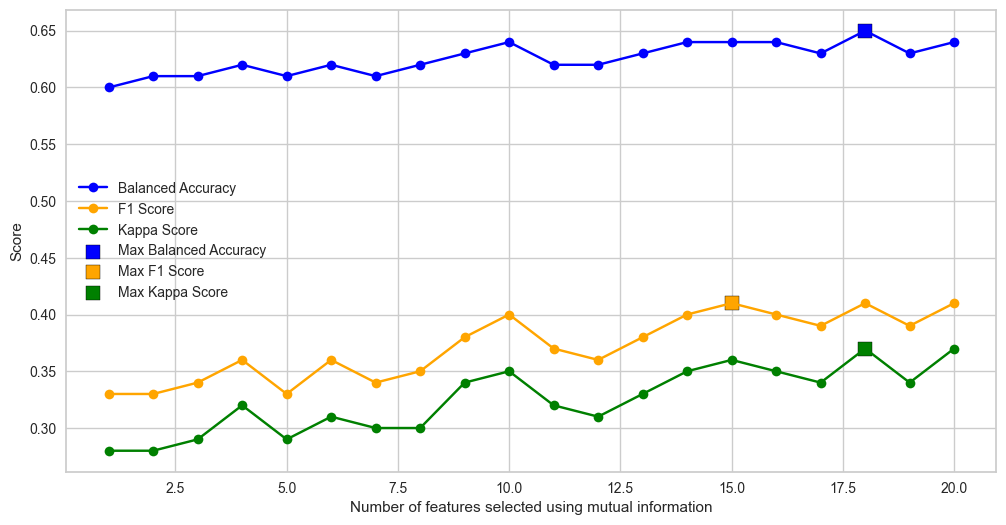

In [18]:
# Plotting the results
plt.figure(figsize=(12, 6))

# Plot each metric
plt.plot(k_list, bal_acc_list, marker='o', label='Balanced Accuracy', color='blue')
plt.plot(k_list, f1_score_list, marker='o', label='F1 Score', color='orange')
plt.plot(k_list, kappa_list, marker='o', label='Kappa Score', color='green')

# Mark maximum values
max_bal_acc = np.max(bal_acc_list)
max_f1 = np.max(f1_score_list)
max_kappa = np.max(kappa_list)

# Display max values
plt.scatter(np.argmax(bal_acc_list) + 1, max_bal_acc, color='blue', s=100, edgecolor='black', label='Max Balanced Accuracy', marker='s')
plt.scatter(np.argmax(f1_score_list) + 1, max_f1, color='orange', s=100, edgecolor='black', label='Max F1 Score', marker='s')
plt.scatter(np.argmax(kappa_list) + 1, max_kappa, color='green', s=100, edgecolor='black', label='Max Kappa Score', marker='s')

# Add labels and title
plt.xlabel('Number of features selected using mutual information')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()

In [19]:
# Print maximum scores
print('Max Bal Acc:', max_bal_acc)
print('Max F1 score:', max_f1)
print('Max kappa:', max_kappa)

Max Bal Acc: 0.65
Max F1 score: 0.41
Max kappa: 0.37


In [20]:
# Identify the best number of features based on balanced accuracy
best_k_using_bal_acc = np.argmax(bal_acc_list) + 1
best_k_using_bal_acc

18

In [21]:
# Feature selection using the best k features
selector = SelectKBest(mutual_info_classif, k=best_k_using_bal_acc)
selector.fit(X_train, y_train)

selected_feature_mask = selector.get_support()
selected_features = X_train.columns[selected_feature_mask]
selected_features

Index(['KALORI_KAP', 'Pengeluaran_Jenis_A', 'Pengeluaran_Jenis_B',
       'Pengeluaran_Jenis_C', 'Pengeluaran_Jenis_D', 'Pengeluaran_Jenis_E',
       'Pengeluaran_Jenis_F', 'Pengeluaran_Jenis_G', 'Pengeluaran_Jenis_H',
       'Pengeluaran_Jenis_J', 'Pengeluaran_Jenis_K', 'Pengeluaran_Jenis_L',
       'Pengeluaran_Jenis_M', 'Pengeluaran_Jenis_N', 'R2208A4',
       'nilai_bantuan(rp)', 'rataan_telur(rp)', 'rataan_lainnya(rp)'],
      dtype='object')

In [22]:
# Evaluate model using holdout with selected features
eval_model_holdout(stacking_ensemble, X_train[selected_features], y_train, X_test[selected_features], y_test, plot=False)

Holdout Evaluation (Train):
Balanced Accuracy: 0.74
F1 Score: 0.62
Kappa: 0.59

Holdout Evaluation (Test):
Balanced Accuracy: 0.65
F1 Score: 0.42
Kappa: 0.37
Sensitivity (Recall): 0.32
Specificity: 0.97


In [23]:
eval_model_CV(stacking_ensemble, X_ori[selected_features], y_ori)

Mean Bal Acc (Test)  : 0.65
Mean F1 Score (Test) : 0.42
Mean Kappa (Test)    : 0.38
Mean Sensitivity (Test): 0.32
Mean Specificity (Test): 0.98


## RFE

In [24]:
X_train_v3, X_test_v3, y_train_v3, y_test_v3 = X_train.copy(), X_test.copy(), y_train.copy(), y_test.copy()

In [25]:
# Lists to store evaluation metrics
bal_acc_list = []
f1_score_list = []
kappa_list = []
k_list = []

for k in range(1, 21):
    RFE_rf = RFE(estimator=rf_model, n_features_to_select=k, step=1)
    RFE_rf.fit(X_train_v3, y_train_v3)
    sel_X_train_rf = RFE_rf.transform(X_train_v3)
    sel_X_test_rf = RFE_rf.transform(X_test_v3)
 
    RFE_xgb = RFE(estimator=xgb_model, n_features_to_select=k, step=1)
    RFE_xgb.fit(X_train_v3, y_train_v3)
    sel_X_train_xgb = RFE_xgb.transform(X_train_v3)
    sel_X_test_xgb = RFE_xgb.transform(X_test_v3)

    sel_X_train_v3 = np.concatenate([sel_X_train_rf, sel_X_train_xgb], axis=1)
    sel_X_test_v3 = np.concatenate([sel_X_test_rf, sel_X_test_xgb], axis=1)
    
    stacking_ensemble.fit(sel_X_train_v3, y_train_v3)
    RFE_preds = stacking_ensemble.predict(sel_X_test_v3)

    bal_acc_kbest = round(balanced_accuracy_score(y_test_v3, RFE_preds), 2)
    f1_score_kbest = round(f1_score(y_test_v3, RFE_preds), 2)
    kappa_kbest = round(cohen_kappa_score(y_test_v3, RFE_preds), 2)
    
    bal_acc_list.append(bal_acc_kbest)
    f1_score_list.append(f1_score_kbest)
    kappa_list.append(kappa_kbest)
    k_list.append(k)

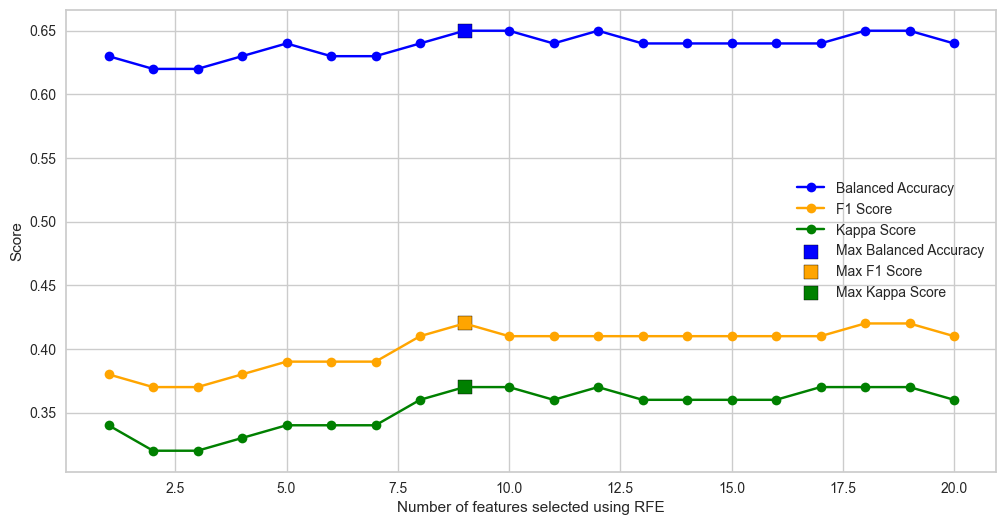

In [ ]:
# Plotting the results
plt.figure(figsize=(12, 6))

# Plot each metric
plt.plot(k_list, bal_acc_list, marker='o', label='Balanced Accuracy', color='blue')
plt.plot(k_list, f1_score_list, marker='o', label='F1 Score', color='orange')
plt.plot(k_list, kappa_list, marker='o', label='Kappa Score', color='green')

# Mark maximum values
max_bal_acc = np.max(bal_acc_list)
max_f1 = np.max(f1_score_list)
max_kappa = np.max(kappa_list)

# Display max values
plt.scatter(np.argmax(bal_acc_list) + 1, max_bal_acc, color='blue', s=100, edgecolor='black', label='Max Balanced Accuracy', marker='s')
plt.scatter(np.argmax(f1_score_list) + 1, max_f1, color='orange', s=100, edgecolor='black', label='Max F1 Score', marker='s')
plt.scatter(np.argmax(kappa_list) + 1, max_kappa, color='green', s=100, edgecolor='black', label='Max Kappa Score', marker='s')

# Add labels and title
plt.xlabel('Number of features selected using RFE')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()

In [33]:
# Print maximum scores
print('Max Bal Acc:', max_bal_acc)
print('Max F1 score:', max_f1)
print('Max kappa:', max_kappa)

Max Bal Acc: 0.65
Max F1 score: 0.42
Max kappa: 0.37


In [34]:
# Determine best k based on balanced accuracy
best_k_using_bal_acc = np.argmax(bal_acc_list) + 1
best_k_using_bal_acc

9

In [35]:
# Final RFE selection dengan jumlah fitur terbaik untuk masing-masing model
RFE_rf_final = RFE(estimator=rf_model, n_features_to_select=best_k_using_bal_acc, step=1)
RFE_xgb_final = RFE(estimator=xgb_model, n_features_to_select=best_k_using_bal_acc, step=1)

RFE_rf_final.fit(X_train_v3, y_train_v3)
RFE_xgb_final.fit(X_train_v3, y_train_v3)

# Mendapatkan mask fitur yang dipilih oleh RFE untuk masing-masing model
selected_features_mask_rf = RFE_rf_final.get_support()
selected_features_mask_xgb = RFE_xgb_final.get_support()

# Mendapatkan nama fitur yang terpilih dari Random Forest dan XGBoost
selected_features_rf = X_train_v3.columns[selected_features_mask_rf]
selected_features_xgb = X_train_v3.columns[selected_features_mask_xgb]

# Menggabungkan fitur tanpa duplikasi
selected_features_combined = selected_features_rf.union(selected_features_xgb)

# Jika gabungan fitur melebihi jumlah best_k_using_bal_acc, pilih hanya best_k_using_bal_acc fitur
if len(selected_features_combined) > best_k_using_bal_acc:
    # Menghitung frekuensi kemunculan fitur yang terpilih di antara kedua model
    all_selected_features = list(selected_features_rf) + list(selected_features_xgb)
    feature_counts = pd.Series(all_selected_features).value_counts()

    # Memilih hanya `best_k_using_bal_acc` fitur yang paling sering muncul
    selected_features_combined = feature_counts.nlargest(best_k_using_bal_acc).index.tolist()

# Seleksi data latih dan data uji berdasarkan fitur gabungan yang telah dipilih
sel_X_train_final = X_train_v3[selected_features_combined]
sel_X_test_final = X_test_v3[selected_features_combined]

# Memeriksa apakah selected_features_combined telah berhasil dibuat dan sesuai dengan jumlah fitur yang diinginkan
print("Fitur terpilih untuk model stacking:", selected_features_combined)
print("Jumlah fitur terpilih:", len(selected_features_combined))


Fitur terpilih untuk model stacking: ['KALORI_KAP', 'Pengeluaran_Jenis_D', 'Pengeluaran_Jenis_N', 'R105', 'Pengeluaran_Jenis_B', 'nilai_bantuan(rp)', 'rataan_beras(rp)', 'rataan_telur(rp)', 'rataan_lainnya(rp)']
Jumlah fitur terpilih: 9


Holdout Evaluation (Train):
Balanced Accuracy: 0.72
F1 Score: 0.58
Kappa: 0.55

Holdout Evaluation (Test):
Balanced Accuracy: 0.64
F1 Score: 0.39
Kappa: 0.34
Sensitivity (Recall): 0.3
Specificity: 0.97


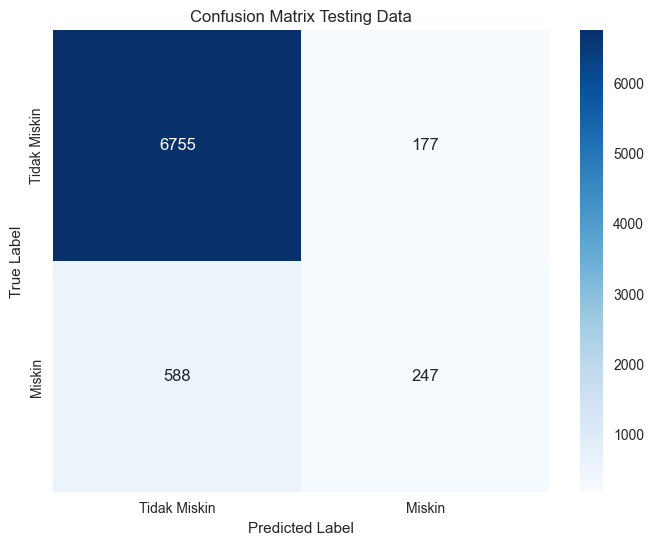

In [36]:
sel_X_train_final = X_train_v3[selected_features_combined]
sel_X_test_final = X_test_v3[selected_features_combined]
eval_model_holdout(stacking_ensemble, sel_X_train_final, y_train_v3, sel_X_test_final, y_test_v3, plot=True)

In [31]:
eval_model_CV(stacking_ensemble, X_ori[selected_features_combined], y_ori)

Mean Bal Acc (Test)  : 0.63
Mean F1 Score (Test) : 0.39
Mean Kappa (Test)    : 0.34
Mean Sensitivity (Test): 0.29
Mean Specificity (Test): 0.98


## PSO

In [14]:
X_train_v4, X_test_v4, y_train_v4, y_test_v4 = X_train.copy(), X_test.copy(), y_train.copy(), y_test.copy()

In [20]:

# Define objective function for PSO
def objective_function(swarm_position, X, y, model):
    n_particles = swarm_position.shape[0]
    costs = np.zeros(n_particles)

    for i in range(n_particles):
        # Binary mask for selected features
        mask = swarm_position[i] > 0.5
        if np.sum(mask) == 0:
            costs[i] = float('inf')  # Assign high cost for no features selected
        else:
            X_subset = X[:, mask]
            scores = cross_val_score(model, X_subset, y, cv=5, scoring='balanced_accuracy')
            costs[i] = -np.mean(scores)  # Negative to minimize

    return costs

# Convert DataFrame to NumPy arrays
X_train_np = X_train_v4.values
X_test_np = X_test_v4.values
y_train_np = y_train_v4.values
y_test_np = y_test_v4.values

# PSO options
options = {'c1': 0.5, 'c2': 0.3, 'w': 0.9}

# Initialize models
rf_model = RandomForestClassifier(random_state=86)
xgb_model = XGBClassifier(random_state=86, eval_metric='logloss')

# PSO for Random Forest
optimizer_rf = GlobalBestPSO(n_particles=20, dimensions=X_train_np.shape[1], options=options)
cost_rf, pos_rf = optimizer_rf.optimize(objective_function, iters=50, X=X_train_np, y=y_train_np, model=rf_model)
selected_rf = pos_rf > 0.5
sel_X_train_rf = X_train_np[:, selected_rf]
sel_X_test_rf = X_test_np[:, selected_rf]

# PSO for XGBoost
optimizer_xgb = GlobalBestPSO(n_particles=20, dimensions=X_train_np.shape[1], options=options)
cost_xgb, pos_xgb = optimizer_xgb.optimize(objective_function, iters=50, X=X_train_np, y=y_train_np, model=xgb_model)
selected_xgb = pos_xgb > 0.5
sel_X_train_xgb = X_train_np[:, selected_xgb]
sel_X_test_xgb = X_test_np[:, selected_xgb]

# Combine selected features from RF and XGB
sel_X_train_stacking = np.concatenate([sel_X_train_rf, sel_X_train_xgb], axis=1)
sel_X_test_stacking = np.concatenate([sel_X_test_rf, sel_X_test_xgb], axis=1)

# Define stacking ensemble
estimators = [('rf', rf_model), ('xgb', xgb_model)]
stacking_ensemble = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(random_state=86))
stacking_ensemble.fit(sel_X_train_stacking, y_train_v4)

# Predictions and metrics
stacking_preds = stacking_ensemble.predict(sel_X_test_stacking)
bal_acc_stacking = balanced_accuracy_score(y_test_v4, stacking_preds)
f1_stacking = f1_score(y_test_v4, stacking_preds)
kappa_stacking = cohen_kappa_score(y_test_v4, stacking_preds)

2024-11-15 16:37:37,935 - pyswarms.single.global_best - INFO - Optimize for 50 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|50/50, best_cost=-0.668
2024-11-15 18:06:55,817 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.667654266619121, best pos: [0.6946083  1.35611652 1.46905061 0.87929463 0.9649428  1.16173132
 2.28562209 1.03111379 0.62058953 0.40293025 0.89798545 0.6404104
 0.01545734 0.81448232 0.55670664 1.60579043 0.85982574 0.85388983
 0.97494055 0.46223894 0.39131009 0.83520404 1.4950787  1.63442428]
2024-11-15 18:06:55,823 - pyswarms.single.global_best - INFO - Optimize for 50 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|50/50, best_cost=-0.681
2024-11-15 18:14:03,644 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.6808233618518609, best pos: [1.36388675 0.80356414 0.91294759 1.10144392 0.20773998 0.99395646
 0.58726272 0.64887847 0

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Pastikan bahwa `bal_acc_list`, `f1_score_list`, dan `kappa_list` memiliki elemen
if bal_acc_list and f1_score_list and kappa_list:
    # Hitung jumlah fitur terpilih berdasarkan posisi terbaik dari PSO
    num_features_rf = [np.sum(pos_rf > 0.5)] * len(bal_acc_list)  # Fitur terpilih oleh RF
    num_features_xgb = [np.sum(pos_xgb > 0.5)] * len(bal_acc_list)  # Fitur terpilih oleh XGB
    num_features_combined = [rf + xgb for rf, xgb in zip(num_features_rf, num_features_xgb)]  # Gabungan fitur RF dan XGB

    # Plotting
    plt.figure(figsize=(12, 6))

    # Plot setiap metrik
    plt.plot(num_features_combined, bal_acc_list, marker='o', label='Balanced Accuracy', color='blue')
    plt.plot(num_features_combined, f1_score_list, marker='o', label='F1 Score', color='orange')
    plt.plot(num_features_combined, kappa_list, marker='o', label='Kappa Score', color='green')

    # Mark nilai maksimum
    max_bal_acc = np.max(bal_acc_list)
    max_f1 = np.max(f1_score_list)
    max_kappa = np.max(kappa_list)

    plt.scatter(num_features_combined[np.argmax(bal_acc_list)], max_bal_acc, color='blue', s=100, edgecolor='black', label='Max Balanced Accuracy', marker='s')
    plt.scatter(num_features_combined[np.argmax(f1_score_list)], max_f1, color='orange', s=100, edgecolor='black', label='Max F1 Score', marker='s')
    plt.scatter(num_features_combined[np.argmax(kappa_list)], max_kappa, color='green', s=100, edgecolor='black', label='Max Kappa Score', marker='s')

    # Tambahkan label dan judul
    plt.xlabel('Number of features selected using PSO')
    plt.ylabel('Score')
    plt.title('Performance Metrics vs Number of Features Selected (PSO)')
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("Error: One or more metric lists are empty. Ensure PSO and evaluation steps ran successfully.")

Error: One or more metric lists are empty. Ensure PSO and evaluation steps ran successfully.


In [ ]:
# Calculate maximum values and their corresponding indices
max_bal_acc = np.max(bal_acc_list)
max_f1 = np.max(f1_score_list)
max_kappa = np.max(kappa_list)

max_bal_acc_idx = np.argmax(bal_acc_list)
max_f1_idx = np.argmax(f1_score_list)
max_kappa_idx = np.argmax(kappa_list)

# Print maximum scores and their corresponding number of selected features
print(f"Max Balanced Accuracy: {max_bal_acc} (Selected Features: {num_features_combined[max_bal_acc_idx]})")
print(f"Max F1 Score: {max_f1} (Selected Features: {num_features_combined[max_f1_idx]})")
print(f"Max Cohen's Kappa: {max_kappa} (Selected Features: {num_features_combined[max_kappa_idx]})")

Error: Metric lists are empty. Ensure PSO and evaluation steps ran successfully.


In [ ]:
# Determine best number of features (k) based on balanced accuracy
best_k_using_bal_acc_idx = np.argmax(bal_acc_list)  # Index of maximum Balanced Accuracy
best_num_features = num_features_combined[best_k_using_bal_acc_idx]  # Corresponding number of features

print(f"Best number of features using Balanced Accuracy: {best_num_features}")

In [ ]:
# Mendapatkan mask fitur yang dipilih oleh PSO untuk masing-masing model
selected_features_mask_rf = pos_rf > 0.5  # Mask dari PSO untuk Random Forest
selected_features_mask_xgb = pos_xgb > 0.5  # Mask dari PSO untuk XGBoost

# Mendapatkan nama fitur yang terpilih dari Random Forest dan XGBoost
selected_features_rf = X_train_v4.columns[selected_features_mask_rf]
selected_features_xgb = X_train_v4.columns[selected_features_mask_xgb]

# Menggabungkan fitur tanpa duplikasi
selected_features_combined = selected_features_rf.union(selected_features_xgb)

# Jika gabungan fitur melebihi jumlah best_k_using_bal_acc, pilih hanya `best_k_using_bal_acc` fitur
if len(selected_features_combined) > best_num_features:
    # Menghitung frekuensi kemunculan fitur yang terpilih di antara kedua model
    all_selected_features = list(selected_features_rf) + list(selected_features_xgb)
    feature_counts = pd.Series(all_selected_features).value_counts()

    # Memilih hanya `best_num_features` fitur yang paling sering muncul
    selected_features_combined = feature_counts.nlargest(best_num_features).index.tolist()

# Seleksi data latih dan data uji berdasarkan fitur gabungan yang telah dipilih
sel_X_train_final = X_train_v4[selected_features_combined]
sel_X_test_final = X_test_v4[selected_features_combined]

# Memeriksa apakah selected_features_combined telah berhasil dibuat dan sesuai dengan jumlah fitur yang diinginkan
print("Fitur terpilih untuk model stacking:", selected_features_combined)
print("Jumlah fitur terpilih:", len(selected_features_combined))